In [176]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [177]:
from google.colab import files
uploaded = files.upload()

Saving credit-approval_csv - pandas.csv to credit-approval_csv - pandas (3).csv


In [178]:
credit = pd.read_csv('credit-approval_csv - pandas.csv')
credit

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [179]:
credit.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [180]:
credit.replace('?', np.NaN, inplace = True)
credit["Age"] = pd.to_numeric(credit["Age"])


In [181]:
credit.fillna(credit.mean(), inplace=True)

In [182]:
def imputeWithMode(df):
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(credit)

In [183]:
credit_drop=credit

In [184]:
credit_drop=credit.drop(["ZipCode"],axis=1)

In [185]:
credit_drop=credit.drop(["Approved"],axis=1)

In [186]:
credit_drop=credit.drop(["CreditScore"],axis=1)

In [187]:
credit_drop


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,f,g,280.0,750,-


In [188]:
credit_drop.describe

<bound method NDFrame.describe of     Gender    Age    Debt Married  ... Citizen ZipCode Income  Approved
0        b  30.83   0.000       u  ...       g   202.0      0         +
1        a  58.67   4.460       u  ...       g    43.0    560         +
2        a  24.50   0.500       u  ...       g   280.0    824         +
3        b  27.83   1.540       u  ...       g   100.0      3         +
4        b  20.17   5.625       u  ...       s   120.0      0         +
..     ...    ...     ...     ...  ...     ...     ...    ...       ...
685      b  21.08  10.085       y  ...       g   260.0      0         -
686      a  22.67   0.750       u  ...       g   200.0    394         -
687      a  25.25  13.500       y  ...       g   200.0      1         -
688      b  17.92   0.205       u  ...       g   280.0    750         -
689      b  35.00   3.375       u  ...       g     0.0      0         -

[690 rows x 15 columns]>

In [189]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in credit_drop:
    if credit_drop[col].dtypes=='object':
        credit_drop[col]=LE.fit_transform(credit_drop[col])

In [190]:
credit_drop.head(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.250,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,2,120.0,0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,1,0,360.0,0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,1,0,164.0,31285,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,80.0,1349,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,180.0,314,0
9,1,42.50,4.915,2,2,12,7,3.165,1,0,1,0,52.0,1442,0


In [191]:
credit_dummies = pd.get_dummies(credit_drop, columns=[ "Married","EducationLevel", "Citizen", "DriversLicense"])
credit_dummies.head()

,Gender,Age,Debt,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,ZipCode,Income,Approved,Married_0,Married_1,Married_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3,EducationLevel_4,EducationLevel_5,EducationLevel_6,EducationLevel_7,EducationLevel_8,EducationLevel_9,EducationLevel_10,EducationLevel_11,EducationLevel_12,EducationLevel_13,Citizen_0,Citizen_1,Citizen_2,DriversLicense_0,DriversLicense_1
0,1,30.83,0.000,0,7,1.25,1,1,202.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,58.67,4.460,0,3,3.04,1,1,43.0,560,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,0,24.50,0.500,0,3,1.50,1,0,280.0,824,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,1,27.83,1.540,0,7,3.75,1,1,100.0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,1,20.17,5.625,0,7,1.71,1,0,120.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


In [192]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'Ethnicity', 'YearsEmployed',
       'PriorDefault', 'Employed', 'ZipCode', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1'],
      dtype='object')

In [193]:
credit_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             690 non-null    int64  
 1   Age                690 non-null    float64
 2   Debt               690 non-null    float64
 3   BankCustomer       690 non-null    int64  
 4   Ethnicity          690 non-null    int64  
 5   YearsEmployed      690 non-null    float64
 6   PriorDefault       690 non-null    int64  
 7   Employed           690 non-null    int64  
 8   ZipCode            690 non-null    float64
 9   Income             690 non-null    int64  
 10  Approved           690 non-null    int64  
 11  Married_0          690 non-null    uint8  
 12  Married_1          690 non-null    uint8  
 13  Married_2          690 non-null    uint8  
 14  EducationLevel_0   690 non-null    uint8  
 15  EducationLevel_1   690 non-null    uint8  
 16  EducationLevel_2   690 non

In [194]:
credit_dummies.describe()

,Gender,Age,Debt,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,ZipCode,Income,Approved,Married_0,Married_1,Married_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3,EducationLevel_4,EducationLevel_5,EducationLevel_6,EducationLevel_7,EducationLevel_8,EducationLevel_9,EducationLevel_10,EducationLevel_11,EducationLevel_12,EducationLevel_13,Citizen_0,Citizen_1,Citizen_2,DriversLicense_0,DriversLicense_1
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,0.475362,5.098551,2.223406,0.523188,0.427536,184.014771,1017.385507,0.555072,0.002899,0.760870,0.236232,0.078261,0.211594,0.059420,0.043478,0.036232,0.076812,0.085507,0.014493,0.073913,0.055072,0.113043,0.004348,0.092754,0.055072,0.905797,0.011594,0.082609,0.542029,0.457971
std,0.460464,11.853273,4.978163,0.850238,2.510731,3.346513,0.499824,0.495080,172.159274,5210.102598,0.497318,0.053799,0.426862,0.425074,0.268776,0.408735,0.236581,0.204079,0.187002,0.266485,0.279838,0.119597,0.261819,0.228287,0.316876,0.065842,0.290297,0.228287,0.292323,0.107128,0.275490,0.498592,0.498592
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,0.000000,3.000000,0.165000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,0.000000,7.000000,1.000000,1.000000,0.000000,160.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,37.707500,7.207500,0.000000,7.000000,2.625000,1.000000,1.000000,272.000000,395.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,80.250000,28.000000,2.000000,8.000000,28.500000,1.000000,1.000000,2000.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


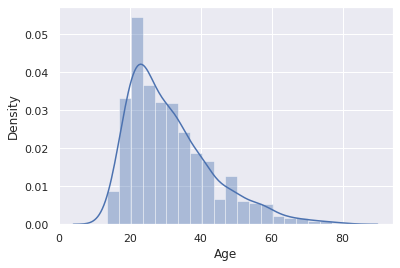

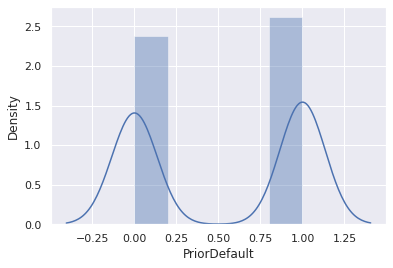

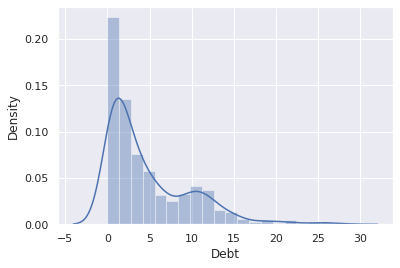

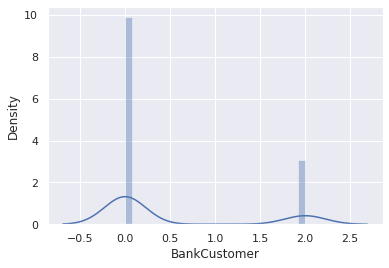

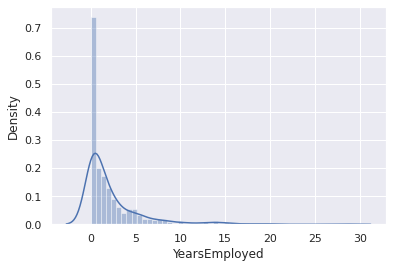

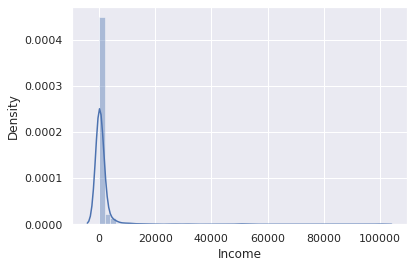

<Figure size 432x288 with 0 Axes>

In [195]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(credit_drop['Age'])
plotDistPlot(credit_drop['PriorDefault'])
plotDistPlot(credit_drop['Debt'])
#plotDistPlot(credit_drop['CreditScore'])
plotDistPlot(credit_drop['BankCustomer'])
plotDistPlot(credit_drop['YearsEmployed'])
plotDistPlot(credit_drop['Income'])
plt.savefig('Distribution.jpeg')

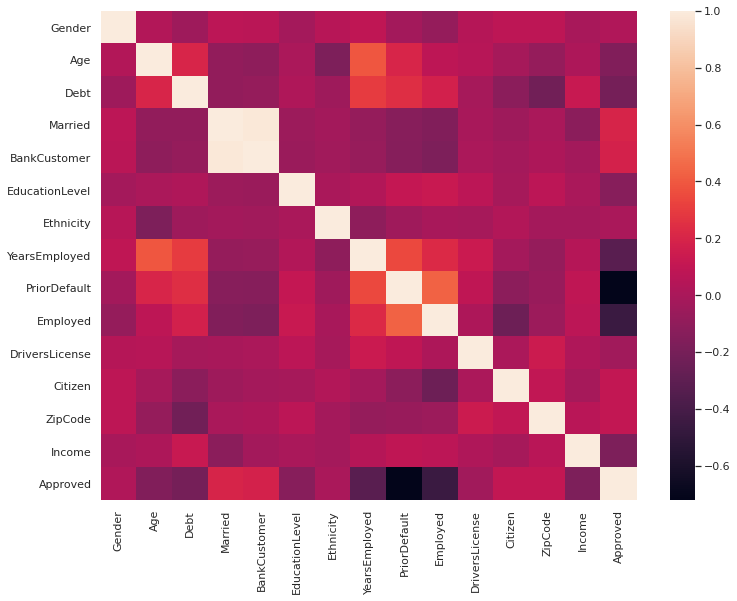

In [196]:
#cooooo
corr = credit_drop.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('corelation.jpg')

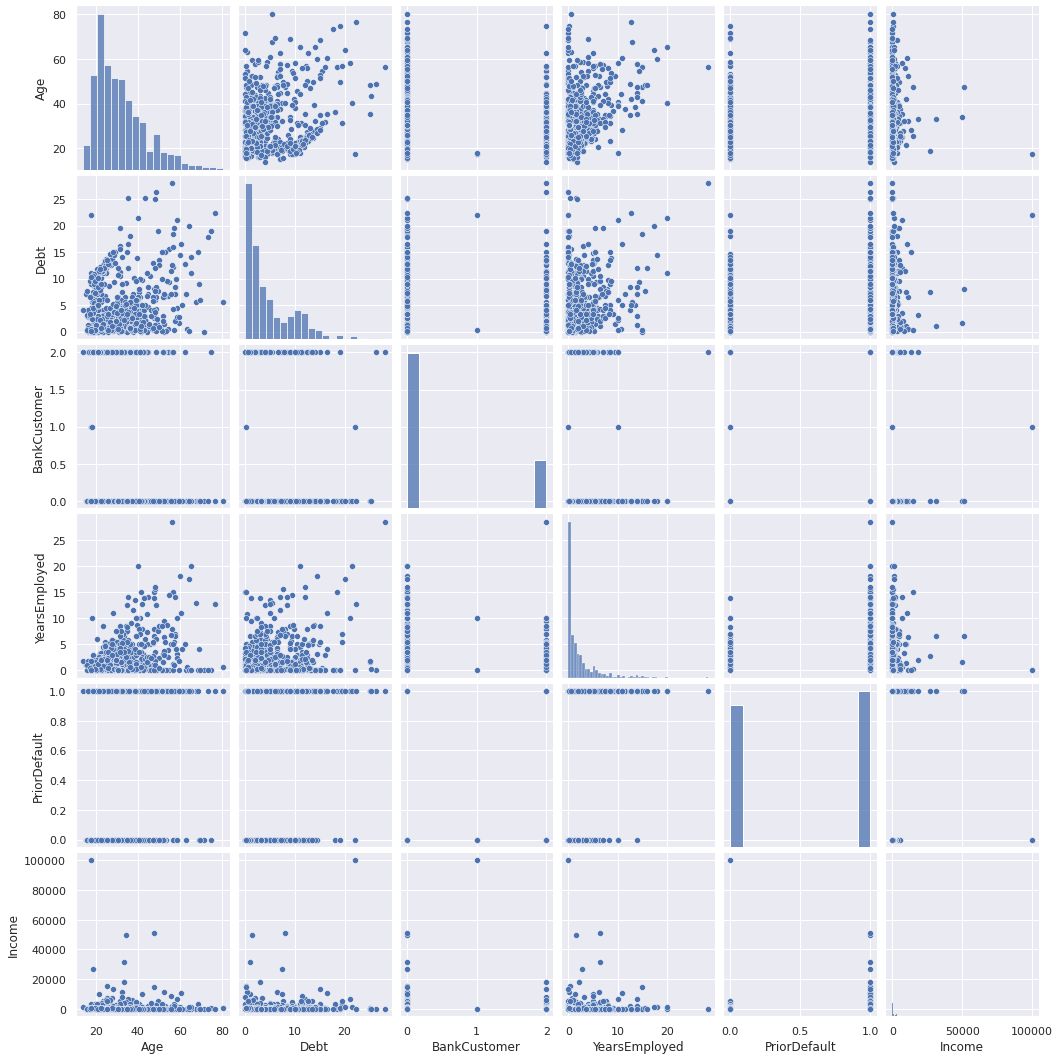

<Figure size 432x288 with 0 Axes>

In [197]:
#scatterplot
sns.set()
cols = ['Age', 'Debt', 'BankCustomer','YearsEmployed','PriorDefault','Income'] #'CreditScore',
sns.pairplot(credit_drop[cols], size = 2.5)
plt.show();
plt.savefig('scatterplot.jpg')

In [198]:
credit_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'Ethnicity', 'YearsEmployed',
       'PriorDefault', 'Employed', 'ZipCode', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1'],
      dtype='object')

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
credit_dummies.to_numpy

<bound method DataFrame.to_numpy of      Gender    Age    Debt  ...  Citizen_2  DriversLicense_0  DriversLicense_1
0         1  30.83   0.000  ...          0                 1                 0
1         0  58.67   4.460  ...          0                 1                 0
2         0  24.50   0.500  ...          0                 1                 0
3         1  27.83   1.540  ...          0                 0                 1
4         1  20.17   5.625  ...          1                 1                 0
..      ...    ...     ...  ...        ...               ...               ...
685       1  21.08  10.085  ...          0                 1                 0
686       0  22.67   0.750  ...          0                 0                 1
687       0  25.25  13.500  ...          0                 0                 1
688       1  17.92   0.205  ...          0                 1                 0
689       1  35.00   3.375  ...          0                 0                 1

[690 rows x 33 

In [201]:
#X,y = credit_dummies.iloc[:,credit_dummies.columns != 'Approved'] , credit_dummies["Approved"]

X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [202]:
X_train.head()

,Gender,Age,Debt,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Married_0,Married_1,Married_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3,EducationLevel_4,EducationLevel_5,EducationLevel_6,EducationLevel_7,EducationLevel_8,EducationLevel_9,EducationLevel_10,EducationLevel_11,EducationLevel_12,EducationLevel_13,Citizen_0,Citizen_1,Citizen_2,DriversLicense_0,DriversLicense_1
227,0,22.50,8.460,2,7,2.460,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
469,1,16.33,4.085,0,3,0.415,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
237,1,21.33,7.500,0,7,1.415,1,1,1,9800,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
120,1,39.92,6.210,0,7,0.040,1,1,1,300,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
273,1,38.25,10.125,2,7,0.125,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [203]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [204]:
rescaledX = scaler.transform(X)


In [242]:
from sklearn.ensemble import RandomForestClassifier                                    #RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=690)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.8623188405797102


array([[47, 15],
       [ 4, 72]])

In [212]:
Age=int(input('enter your age'))
Debt=int(input('0,1,2,3...lakhs'))
EducationLevel=int(input('eductional status'))
YearsEmployed=int(input('years employed'))
Gender=input('male/female')
Married=input('Yes or No')
BankCustomer=input('Yes or No')
PriorDefault=input('yes/no')
Employed=input('yes/no')
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
i=0
j=0
if Gender=='male' or Gender=='MALE' or Gender=='Male':
    a=1
elif Gender=='female' or Gender=='FEMALE'or Gender=='Female':
    b=1
if Married=='yes' or Married=='YES'or Married=='Yes':
    c=1
elif Married=='no' or Married=='NO' or Married=='No':
    d=1
if BankCustomer=='yes' or BankCustomer=='YES' or BankCustomer=='Yes':
    e=1
elif BankCustomer=='no' or BankCustomer=='NO' or BankCustomer=='No':
    f=1
if PriorDefault=='yes' or PriorDefault=='YES' or PriorDefault=='Yes':
    g=1
elif PriorDefault=='no' or PriorDefault=='NO' or PriorDefault=='No':
    h=1
if Employed=='yes' or Employed=='YES' or Employed=='Yes':
    i=1
elif Employed=='no' or Employed=='NO' or Employed=='No':
    j=1
rf.score=pd.DataFrame(data=[[Age,Debt,EducationLevel,YearsEmployed,a,b,c,d,e,f,g,h,i,j],columns=['Age','Debt','EducationLevel','YearsEmployed','Gender_male','Gender_female','Married_yes','Married_no','BankCustomer_yes','BankCustomer_no','PriorDefault_yes','PriorDefault_no','Employed_yes','Employed_no'])
print(model.predict(rf.score))

SyntaxError: ignored

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.savefig('featureimportance.jpg')

In [ ]:
#credit_dummies = credit_dummies.drop(['Approved'], axis=1)
features = credit_dummies.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.figure(figsize=(700,100))
plt.savefig('features.jpg')